In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# アヤメのデータを読み込み、dfに格納
df = pd.read_csv(filepath_or_buffer="/content/drive/My Drive/csv/iris.csv")
#データの確認
display(df.head())

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# アヤメのデータをtrain_Xにコピー
train_X = df
# train_Xから、Species列を取り除く
train_X = train_X.drop( 'Species' ,axis = 1)

#train_X = train_X.drop('SepalWidth',axis = 1)
#train_X = train_X.drop('PetalWidth',axis = 1)

# データの確認
train_X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# KMean法のライブラリをインポート
from sklearn.cluster import KMeans
# クラスタリングのモデル作成
## n_clusters = クラスタ数
kmodel = KMeans(n_clusters= 3,random_state = 0)
kmodel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [7]:
# クラスタリングを実行
#　各データに、番号を割り振る
kmodel.fit( train_X )
# 割り振った番号をtrain_Yに格納
train_Y = kmodel.labels_
# 結果を確認
print(train_Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [9]:
# dfをdf_resultにコピー
df_result = df
# df_resultに、列「クラスタ番号」を追加し、クラスタリングの結果を格納
df_result['クラスタ番号'] = train_Y

# 結果の確認
#pd.set_option('display.max_rows',150)
display(df_result)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,クラスタ番号
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


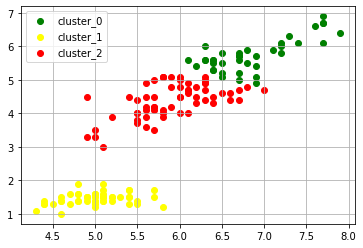

In [10]:
# 散布図で確認
plt.scatter(train_X[train_Y == 0]['SepalLength'],
            train_X[train_Y == 0]['PetalLength'],
            c='green',
            label='cluster_0')
plt.scatter(train_X[train_Y == 1]['SepalLength'],
            train_X[train_Y == 1]['PetalLength'],
            c='yellow',
            label='cluster_1')
plt.scatter(train_X[train_Y == 2]['SepalLength'],
            train_X[train_Y == 2]['PetalLength'],
            c='red',
            label='cluster_2')
plt.grid()
plt.legend(loc="upper left")
plt.show()